# Bibliothèques Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df=pd.read_csv('all_content_2020_v4.csv',na_values=['s','nd'])


### changement de data type de la variable MED20

df['MED20']=df['MED20'].astype(float)

## suppression des enregistrements

df_MED20=df.dropna(axis=0,subset=['MED20'])

print(df.shape)



(34955, 738)


C:\Users\dmoll_svp\AppData\Local\Temp\ipykernel_28836\3601457579.py:7: DtypeWarning: Columns (1,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('all_content_2020_v4.csv',na_values=['s','nd'])


# Dataset

In [ ]:
df=pd.read_csv('all_content_2020_v5.csv',na_values=['s','nd'])


### changement de data type de la variable MED20

df['MED20']=df['MED20'].astype(float)

## suppression des enregistrements

df_MED20=df.dropna(axis=0,subset=['MED20'])

print(df.shape)

# Les variables traitant de la pauvreté

(34955, 25)


,Complétude
MED20,89
PIMP20,15
TP6020,12
TP60AGE120,1
TP60AGE220,3
TP60AGE320,4
TP60AGE420,3
TP60AGE520,2
TP60AGE620,1
TP60TOL120,5


Complétude    11.041667
dtype: float64


Text(0.5, 1.0, 'Distribution du taux de complétude')

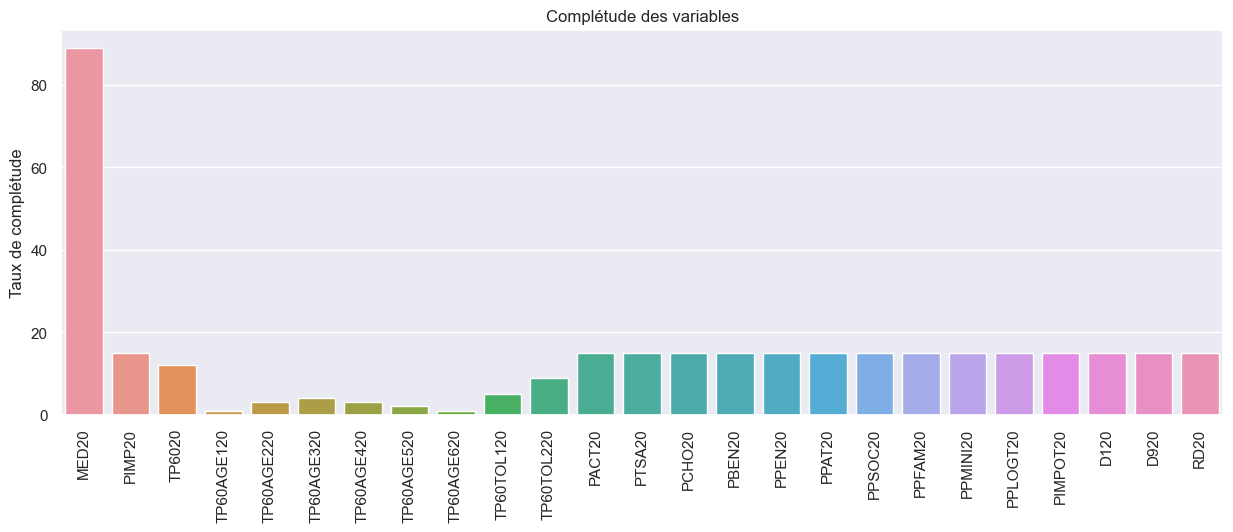

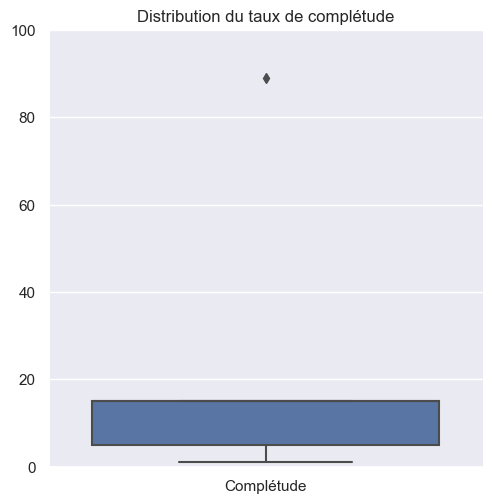

In [3]:
# les variables sur la pauvreté  / création d'un df dédié

df_pauv=df[[
'MED20',
'PIMP20',
'TP6020',
'TP60AGE120',
'TP60AGE220',
'TP60AGE320',
'TP60AGE420',
'TP60AGE520',
'TP60AGE620',
'TP60TOL120',
'TP60TOL220',
'PACT20',
'PTSA20',
'PCHO20',
'PBEN20',
'PPEN20',
'PPAT20',
'PPSOC20',
'PPFAM20',
'PPMINI20',
'PPLOGT20',
'PIMPOT20',
'D120',
'D920',
'RD20']]

print(df_pauv.shape)

# la complétude des données 

df_pauv_na=pd.DataFrame((((df_pauv.shape[0]-df_pauv.isna().sum())/df_pauv.shape[0])*100).astype(int), columns=['Complétude'])

display(df_pauv_na)

print(df_pauv_na.iloc[1:,:].mean())

plt.figure(figsize=(15,5))
sns.barplot(df_pauv_na.T)
plt.xticks(rotation=90);
plt.title('Complétude des variables')
plt.ylabel('Taux de complétude')

sns.catplot(df_pauv_na,kind='box')
plt.ylim([0,100])
plt.title('Distribution du taux de complétude')



# Complétude de la MED20

,info,non_info,info_ideal,taux
nom_region,,,,
Auvergne-Rhône-Alpes,3742,287,4029,0.9
Bourgogne-Franche-Comté,3094,606,3700,0.8
Bretagne,1202,5,1207,1.0
Centre-Val de Loire,1695,62,1757,1.0
Corse,207,153,360,0.6
Grand Est,4229,892,5121,0.8
Guadeloupe,0,32,32,0.0
Guyane,0,22,22,0.0
Hauts-de-France,3513,275,3788,0.9


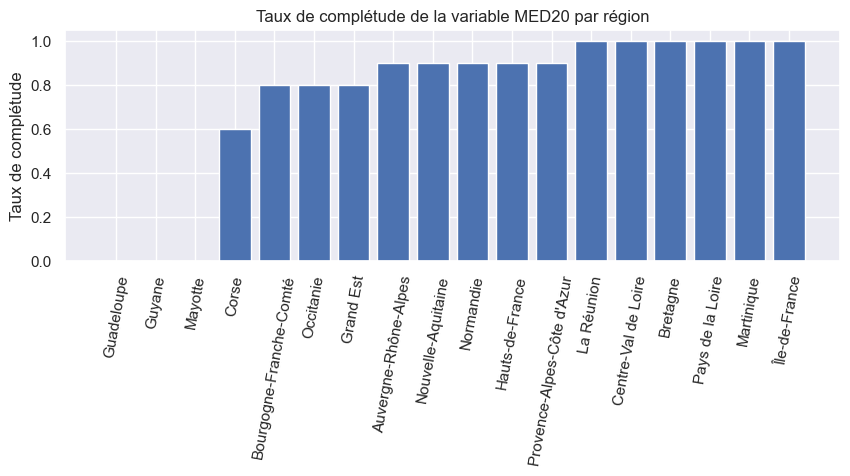

In [4]:
# estimer la représentativité de la variable MED20 par région

stat_reg_med20=pd.crosstab(df.nom_region,df.MED20.isna())
med20_t=pd.DataFrame(stat_reg_med20.iloc[:,:].values,index=stat_reg_med20.index,columns=['info','non_info'])
med20_t['info_ideal']=med20_t['info']+med20_t['non_info']
med20_t['taux']=med20_t['info']/med20_t['info_ideal']
med20_t['taux']=med20_t['taux'].round(1)

plt.figure(figsize=(10,3))
plt.bar(med20_t.sort_values(by='taux',ascending=True).index,med20_t.sort_values(by='taux',ascending=True).taux);
plt.xticks(rotation=80);
plt.ylabel('Taux de complétude')
plt.title ('Taux de complétude de la variable MED20 par région')

display(med20_t)

# Complétude de la TP6020

Text(0.5, 1.0, 'Taux de complétude de la variable TP6020 par région')

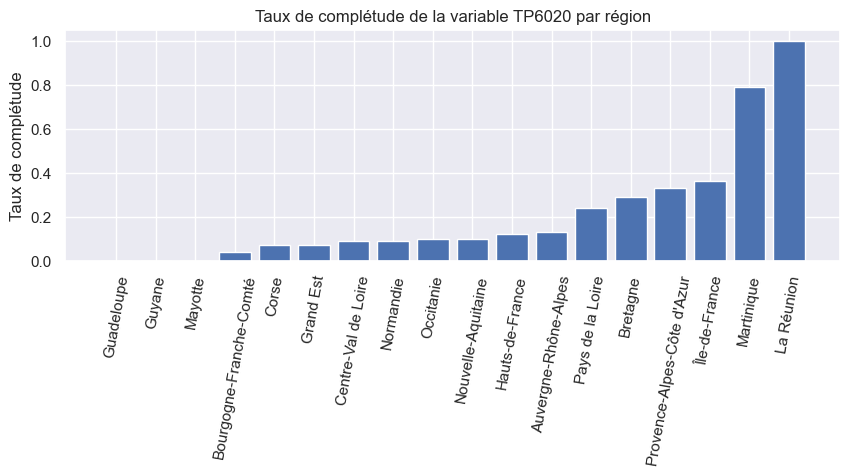

In [5]:
# taux de complétude de la variable TP6020

stat_reg_TP60=pd.crosstab(df.nom_region,df.TP6020.isna())
tp60_t=pd.DataFrame(stat_reg_TP60.iloc[:,:].values,index=stat_reg_TP60.index,columns=['info','non_info'])
tp60_t['info_ideal']=tp60_t['info']+tp60_t['non_info']
tp60_t['taux']=tp60_t['info']/tp60_t['info_ideal']
tp60_t['taux']=tp60_t['taux'].round(2)

                          
plt.figure(figsize=(10,3))
plt.bar(tp60_t.sort_values(by='taux',ascending=True).index,tp60_t.sort_values(by='taux',ascending=True).taux);
plt.xticks(rotation=80);
plt.ylabel('Taux de complétude')
plt.title ('Taux de complétude de la variable TP6020 par région')



# Zone géographique étudiée

In [6]:
# limitation du df au périmètre géographique

df=df[(df.nom_region!='Guadeloupe') &
     (df.nom_region!='Martinique') &
      (df.nom_region!='Guyane') & 
      (df.nom_region!='La Réunion') &
      (df.nom_region!='Mayotte') &
     (df.nom_region!='Corse') 
     ]



# Analyse de la MED20

niveau de vie median moyen 22532.1
niveau de vie median median 22070.0
niveau de vie median min 11780.0
niveau de vie media max 51340.0


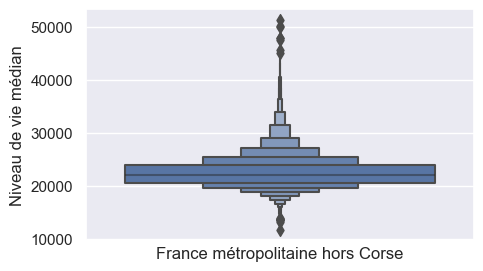

In [7]:
plt.figure(figsize=(5,3))

sns.boxenplot(y='MED20',data=df)
plt.xticks([])
plt.xlabel('France métropolitaine hors Corse')
plt.ylabel('Niveau de vie médian');

print( 'niveau de vie median moyen',df.MED20.mean().round(1))

print( 'niveau de vie median median',df.MED20.median())

print( 'niveau de vie median min',df.MED20.min())

print('niveau de vie media max', df.MED20.max())


# Decomposition de la MED20 en décile

In [8]:
# création du colonne MED20_Q - decomposition de la base en décile

df['MED20_D']=pd.qcut(df.MED20,q=10,labels=['1d','2d','3d','4d','5d','6d','7d','8d','9d','10d'])

MED20                  
          median      min      max
MED20_D                           
1d       18650.0  11780.0  19390.0
2d       19900.0  19400.0  20290.0
3d       20630.0  20300.0  20930.0
4d       21220.0  20940.0  21490.0
5d       21780.0  21500.0  22070.0
6d       22400.0  22080.0  22730.0
7d       23100.0  22740.0  23480.0
8d       23930.0  23490.0  24460.0
9d       25160.0  24470.0  26090.0
10d      27830.0  26100.0  51340.0

Text(0.5, 1.0, 'Niveau de vie médian des communes françaises par décile')

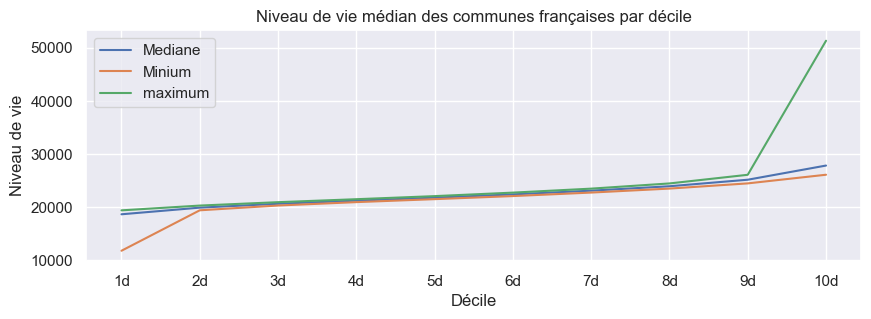

In [9]:
plt.figure(figsize=(10,3))
display(df.groupby('MED20_D').agg({'MED20':['median','min','max']}))
plt.plot(df.groupby('MED20_D').agg({'MED20':['median','min','max']}).index,
         df.groupby('MED20_D').agg({'MED20':['median','min','max']}),label=['Mediane','Minium','maximum'])
plt.legend();
plt.ylabel('Niveau de vie')
plt.xlabel('Décile')
plt.title('Niveau de vie médian des communes françaises par décile')

# Decomposition de la MED20 en centile

In [10]:
# création des centiles
# Label str
# resultat =[]
#for x in list(range(1,101)):
    #resultat.append(str(x)+'c')

df['MED20_C']=pd.qcut(df.MED20,q=100,labels=list(range(1,101)))
df.head()

,Unnamed: 0,CODGEO,EU_circo,num_region,num_dep,nom_commune,nom_dep,nom_region,num_chef_lieu,nom_chef_lieu,...,ETCFZ19,ETCGI19,ETCJZ19,ETCKZ19,ETCLZ19,ETCMN19,ETCOQ19,ETCRU19,MED20_D,MED20_C
0,0,1001,Sud-Est,84,1,L'Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,1.0,2.0,0.0,1.0,0.0,3.0,1.0,1.0,9d,83
1,1,1002,Sud-Est,84,1,L'Abergement-de-Varey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,7d,67
2,2,1004,Sud-Est,84,1,Ambérieu-en-Bugey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,27.0,41.0,9.0,5.0,10.0,27.0,27.0,21.0,4d,33
3,3,1005,Sud-Est,84,1,Ambérieux-en-Dombes,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,7.0,6.0,0.0,0.0,0.0,4.0,1.0,0.0,8d,80
4,4,1006,Sud-Est,84,1,Ambléon,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


MED20                  
          median      min      max
MED20_C                           
1        16340.0  11780.0  16980.0
2        17400.0  16990.0  17700.0
3        17940.0  17710.0  18120.0
4        18290.0  18130.0  18410.0
5        18530.0  18420.0  18650.0
...          ...      ...      ...
96       28095.0  27820.0  28390.0
97       28800.0  28400.0  29240.0
98       29810.0  29250.0  30520.0
99       31680.0  30530.0  32880.0
100      35630.0  32910.0  51340.0

[100 rows x 3 columns]

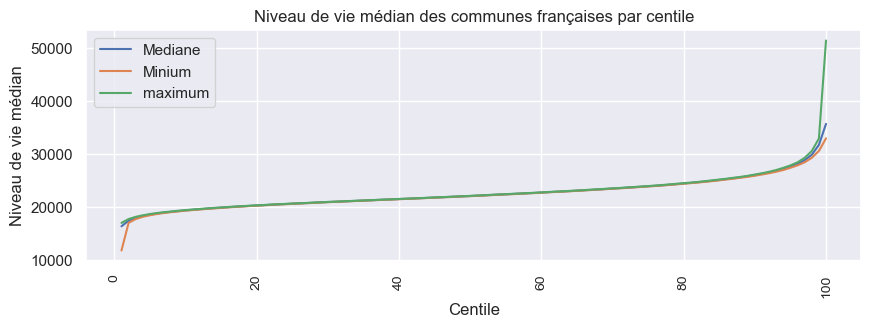

In [11]:
# représentation de MED20 par centile

display((df.groupby('MED20_C').agg({'MED20':['median','min','max']})))

plt.figure(figsize=(10,3))
plt.plot((df.groupby('MED20_C').agg({'MED20':['median','min','max']})).index,
         (df.groupby('MED20_C').agg({'MED20':['median','min','max']})),label=['Mediane','Minium','maximum'])
plt.legend();
plt.xticks(rotation=90,size=10)
plt.ylabel('Niveau de vie médian')
plt.xlabel('Centile')
plt.title('Niveau de vie médian des communes françaises par centile');



,MED20
,count
MED20_C,
1,315
2,306
3,315
4,311
5,323
...,...
96,310
97,310


moyenne du nombre de communes MED20  count    310.19
dtype: float64


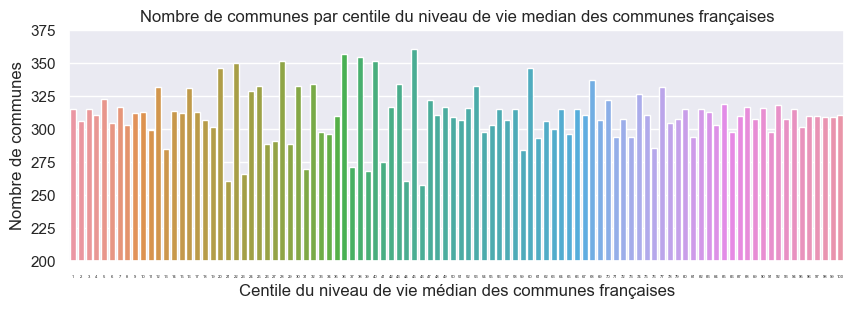

In [12]:
# nombre de commune par centile


display((df.groupby('MED20_C').agg({'MED20':['count']})))

print('moyenne du nombre de communes',(df.groupby('MED20_C').agg({'MED20':['count']})).mean())

plt.figure(figsize=(10,3))
sns.barplot(df.groupby('MED20_C').agg({'MED20':['count']}).T )
plt.xticks(size=3)
plt.ylim([200,375])
plt.title('Nombre de communes par centile du niveau de vie median des communes françaises')
plt.ylabel('Nombre de communes')
plt.xlabel('Centile du niveau de vie médian des communes françaises');

# Création de la variable "niveau de vie"

In [13]:
# Création de la variable "Niveau_de_vie"

def etiquette_nv (x) : 

    if x <11 :
        return 1
    elif x<31:
        return 2
    elif x<71:
        return 3
    elif x<91 :
        return 4
    elif x>90 :
        return 5
    else :
        return 'Problème'
    
df['Niveau_de_vie']=df.MED20_C.apply(lambda x : etiquette_nv(x))  

In [14]:
# vérification des nan

df[['MED20','MED20_D','MED20_C','Niveau_de_vie']].isna().sum()

#aucune perte d'info, les villes contenant des nan sur ces variables peuvent être supprimées

MED20            3447
MED20_D          3447
MED20_C          3447
Niveau_de_vie    3447
dtype: int64

In [15]:
# suppression des nan

df=df.dropna(axis=0,how='all',subset=['MED20','MED20_D','MED20_C','Niveau_de_vie'])

# vérification
df[['MED20','MED20_D','MED20_C','Niveau_de_vie']].isna().sum()

MED20            0
MED20_D          0
MED20_C          0
Niveau_de_vie    0
dtype: int64

In [16]:
# transformation de la dtype de 'Niveau_de_vie' en Int

df.Niveau_de_vie=df.Niveau_de_vie.astype('int')
df.Niveau_de_vie.info()


<class 'pandas.core.series.Series'>
Index: 31019 entries, 0 to 34825
Series name: Niveau_de_vie
Non-Null Count  Dtype
--------------  -----
31019 non-null  int32
dtypes: int32(1)
memory usage: 363.5 KB


Niveau_de_vie
1     3120
2     6234
3    12402
4     6173
5     3090
Name: nom_commune, dtype: int64


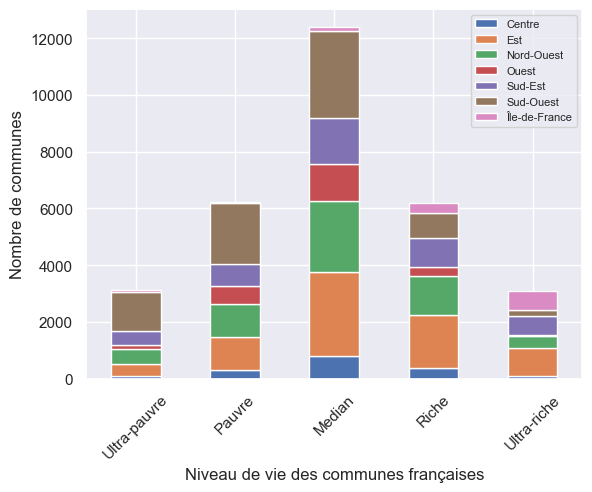

In [17]:
#PREMIERE ANALYSE DU NIVEAU DE VIE

# niveau de vie / par grande région  en nombre de communes.

print(df.groupby(['Niveau_de_vie'])['nom_commune'].count())

N_V=df.groupby(['EU_circo', 'Niveau_de_vie'])['nom_commune'].count().unstack().fillna(0).T

N_V.plot.bar(y=N_V.columns,stacked=True)
plt.xlabel('Niveau de vie des communes françaises')
plt.ylabel('Nombre de communes')
plt.xticks([0,1,2,3,4],['Ultra-pauvre','Pauvre','Median','Riche','Ultra-riche'],rotation=45)
plt.legend(fontsize=8 );


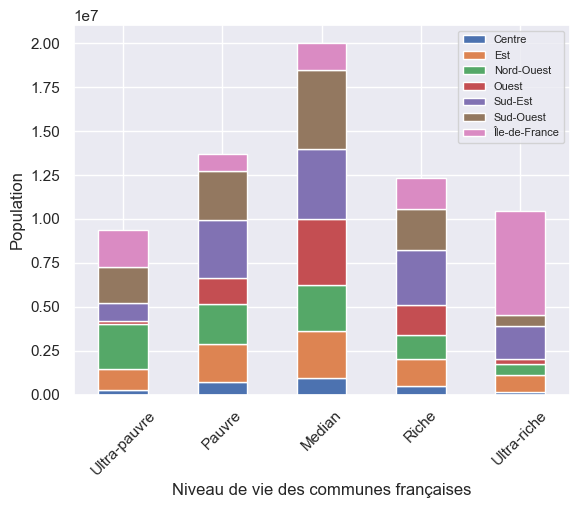

In [18]:
# niveau de vie / par grande région  en nombre d'habitants.

N_V=df.groupby(['EU_circo', 'Niveau_de_vie'])['pop_tot'].sum().unstack().fillna(0).T

N_V.plot.bar(y=N_V.columns,stacked=True)
plt.xlabel('Niveau de vie des communes françaises')
plt.ylabel('Population')
plt.xticks([0,1,2,3,4],['Ultra-pauvre','Pauvre','Median','Riche','Ultra-riche'],rotation=45)
plt.legend(fontsize=8 );


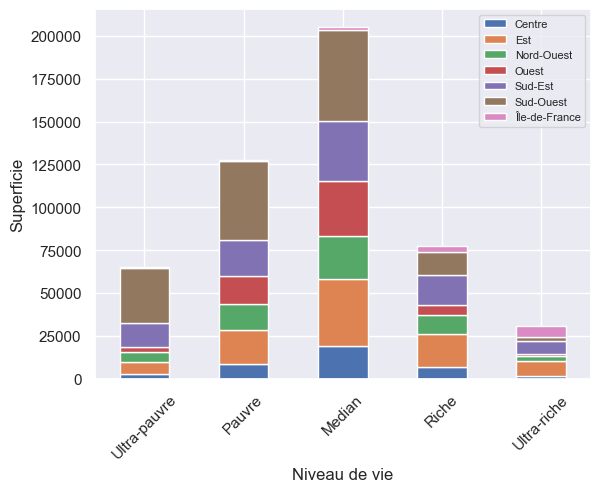

In [19]:

# niveau de vie / par grande région  en superficie.

N_V=df.groupby(['EU_circo', 'Niveau_de_vie'])['SUPERF'].sum().unstack().fillna(0).T

N_V.plot.bar(y=N_V.columns,stacked=True)
plt.xlabel('Niveau de vie')
plt.ylabel('Superficie')
plt.xticks([0,1,2,3,4],['Ultra-pauvre','Pauvre','Median','Riche','Ultra-riche'],rotation=45)
plt.legend(fontsize=8 );

